In [11]:
import keras
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


In [12]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

%matplotlib inline

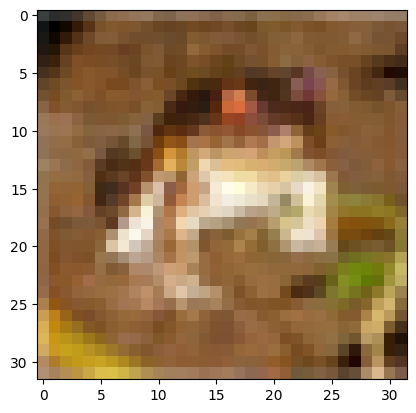

In [14]:
plt.imshow(X_train[0], cmap='gray')

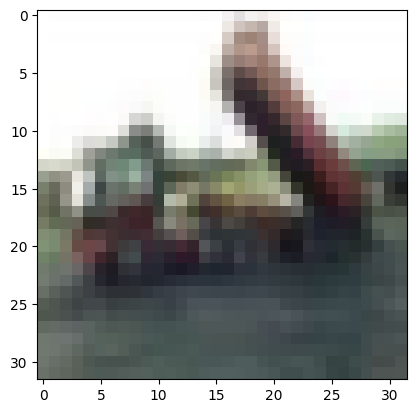

In [15]:
plt.imshow(X_train[2], cmap='gray')

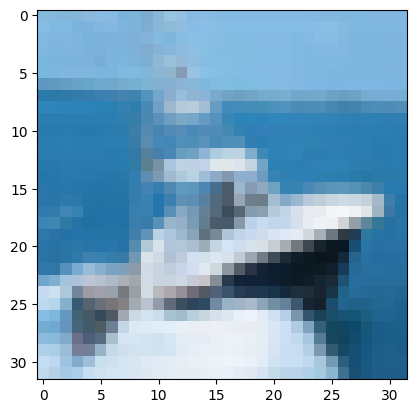

In [16]:
plt.imshow(X_train[8], cmap='gray')

In [17]:
X_train.shape

(50000, 32, 32, 3)

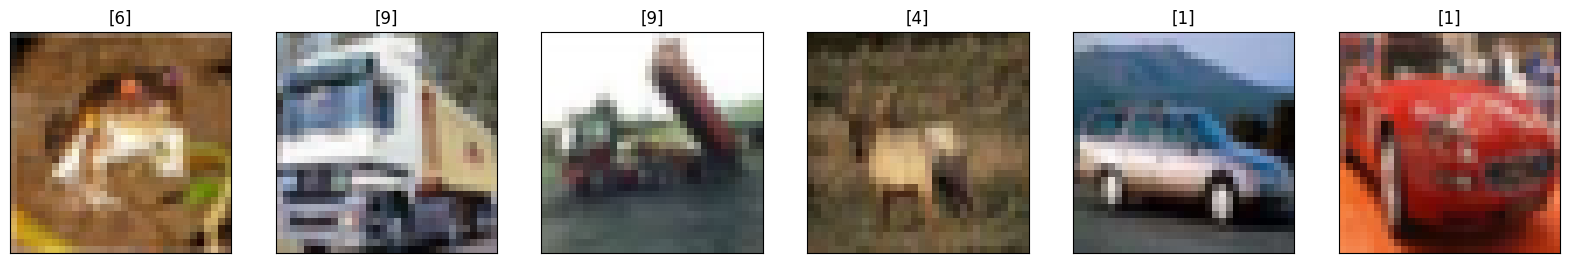

In [18]:
fig = plt.figure(figsize=(20,20))
for i in range(6):
  ax = fig.add_subplot(1, 6, i+1, xticks=[],yticks=[])
  ax.imshow(X_train[i], cmap='gray')
  ax.set_title(str(y_train[i]))

In [19]:
import numpy as np
from tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(y_train))

In [20]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print('One hot valued lables')
print(y_train.shape)

One hot valued lables
(50000, 10)


In [21]:
img_rows, img_cols = 32,32

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(10000, 32, 32, 3)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,602,378 (9.93 MB)

 Trainable params: 2,602,378 (9.93 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])

In [25]:
from re import VERBOSE
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath = 'model.weights.best.keras', verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_test, y_test), callbacks=[checkpointer],
                 verbose=2, shuffle=True)

Epoch 1/5

Epoch 1: val_loss improved from inf to 1.50267, saving model to model.weights.best.keras
782/782 - 322s - 412ms/step - accuracy: 0.3127 - loss: 2.2652 - val_accuracy: 0.4642 - val_loss: 1.5027
Epoch 2/5

Epoch 2: val_loss improved from 1.50267 to 1.45582, saving model to model.weights.best.keras
782/782 - 317s - 405ms/step - accuracy: 0.5051 - loss: 1.4239 - val_accuracy: 0.4872 - val_loss: 1.4558
Epoch 3/5

Epoch 3: val_loss did not improve from 1.45582
782/782 - 319s - 408ms/step - accuracy: 0.5645 - loss: 1.2874 - val_accuracy: 0.4580 - val_loss: 1.8157
Epoch 4/5

Epoch 4: val_loss improved from 1.45582 to 1.23540, saving model to model.weights.best.keras
782/782 - 323s - 414ms/step - accuracy: 0.5834 - loss: 1.2506 - val_accuracy: 0.5919 - val_loss: 1.2354
Epoch 5/5

Epoch 5: val_loss did not improve from 1.23540
782/782 - 324s - 414ms/step - accuracy: 0.5885 - loss: 1.2558 - val_accuracy: 0.5724 - val_loss: 1.2970


In [26]:
from google.colab.patches import cv2_imshow
import os, json, cv2, random

In [27]:
!wget /content/sample_data/bb.jpg -q -o input.jpg

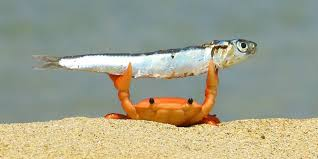

In [28]:
im = cv2.imread('/content/sample_data/bb.jpg')
cv2_imshow(im)

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

%matplotlib inline

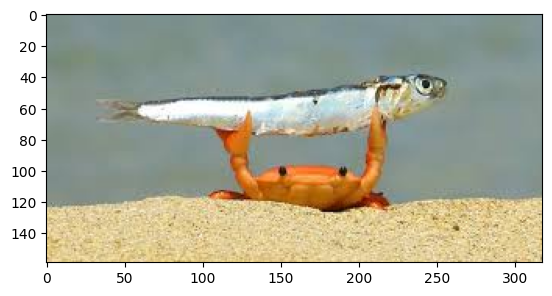

In [30]:
image = mping.imread('/content/sample_data/bb.jpg')

plt.imshow(image)

In [31]:
image.shape

(159, 318, 3)

In [32]:
import cv2

In [33]:
resized = cv2.resize(image, (32,32))

In [34]:
resized.shape

(32, 32, 3)

In [35]:
pred = model.predict(resized.tf.reshape(1,32,32,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


In [51]:
pred

array([[0.11265495, 0.12978789, 0.1402406 , 0.10614916, 0.07918361,
        0.10899234, 0.03849696, 0.09172492, 0.07545429, 0.1173153 ]],
      dtype=float32)

In [40]:
!wget /content/sample_data/cc2.jpg -q -o input.jpg

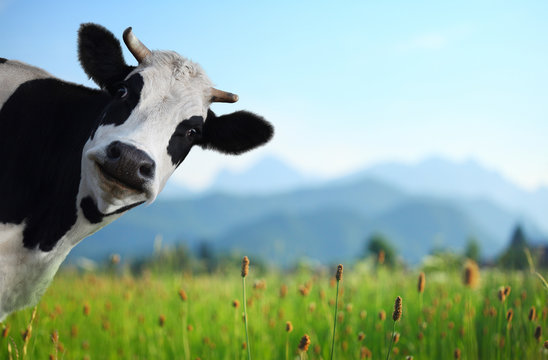

In [41]:
im2 = cv2.imread('/content/sample_data/cc2.jpg')
cv2_imshow(im2)

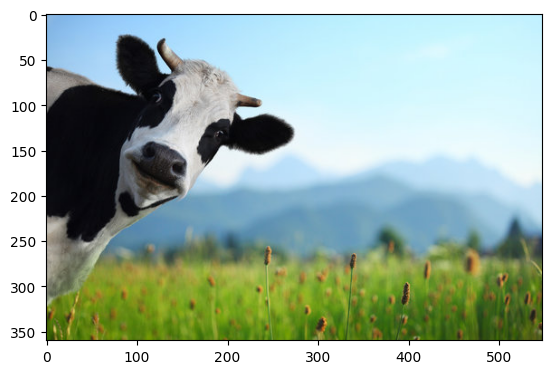

In [42]:
image2 = mping.imread('/content/sample_data/cc2.jpg')

plt.imshow(image2)

In [43]:
image2.shape

(360, 548, 3)

In [44]:
resized2 = cv2.resize(image2, (32,32))

In [45]:
resized2.shape

(32, 32, 3)

In [49]:
import tensorflow as tf
pred2 = model.predict(resized2.reshape(1,32,32,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [50]:
pred2

array([[8.8064623e-01, 2.9168824e-02, 1.1595056e-02, 1.4918862e-02,
        1.5625636e-04, 7.7024642e-03, 1.2440460e-08, 2.6255483e-02,
        2.3240303e-03, 2.7232837e-02]], dtype=float32)

In [52]:
pred

array([[0.11265495, 0.12978789, 0.1402406 , 0.10614916, 0.07918361,
        0.10899234, 0.03849696, 0.09172492, 0.07545429, 0.1173153 ]],
      dtype=float32)